IMPORTS & SEED






In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)


DATASET LOADING & PREPROCESSING

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


MODEL DEFINITION

In [3]:
def build_model(initializer, optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu',
                              kernel_initializer=initializer,
                              input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu',
                              kernel_initializer=initializer),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

PART A — WEIGHT INITIALIZATION COMPARISON

Random Normal + fixed(SGD Optimizer)

In [4]:
model_random = build_model(
    tf.keras.initializers.RandomNormal(),
    tf.keras.optimizers.SGD(learning_rate=0.01)
)

history_random = model_random.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4231 - loss: 2.0140 - val_accuracy: 0.8206 - val_loss: 0.8164
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8360 - loss: 0.7002 - val_accuracy: 0.8750 - val_loss: 0.4653
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8746 - loss: 0.4576 - val_accuracy: 0.8932 - val_loss: 0.3823
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8916 - loss: 0.3873 - val_accuracy: 0.9022 - val_loss: 0.3439
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9004 - loss: 0.3514 - val_accuracy: 0.9098 - val_loss: 0.3200
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9075 - loss: 0.3276 - val_accuracy: 0.9159 - val_loss: 0.3024
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9123 - loss: 0.3096 - val_accuracy: 0.9198 - val_loss: 0.2882
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9166 - loss: 0.2948 - val_accuracy: 0.

Xavier Initialization + fixed(SGD Optimizer)

In [5]:
model_xavier = build_model(
    tf.keras.initializers.GlorotUniform(),
    tf.keras.optimizers.SGD(learning_rate=0.01)
)

history_xavier = model_xavier.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4877 - loss: 1.7554 - val_accuracy: 0.8385 - val_loss: 0.6418
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8516 - loss: 0.5829 - val_accuracy: 0.8824 - val_loss: 0.4203
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8849 - loss: 0.4179 - val_accuracy: 0.8971 - val_loss: 0.3527
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8983 - loss: 0.3584 - val_accuracy: 0.9077 - val_loss: 0.3181
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9069 - loss: 0.3251 - val_accuracy: 0.9152 - val_loss: 0.2954
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9123 - loss: 0.3020 - val_accuracy: 0.9190 - val_loss: 0.2784
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9179 - loss: 0.2843 - val_accuracy: 0.9234 - val_loss: 0.2647
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9230 - loss: 0.2698 - val_accuracy: 0.

He Initialization + fixed(SGD Optimizer)

In [6]:
model_he = build_model(
    tf.keras.initializers.HeNormal(),
    tf.keras.optimizers.SGD(learning_rate=0.01)
)

history_he = model_he.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5137 - loss: 1.6625 - val_accuracy: 0.8532 - val_loss: 0.5618
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8633 - loss: 0.5141 - val_accuracy: 0.8928 - val_loss: 0.3851
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8924 - loss: 0.3806 - val_accuracy: 0.9070 - val_loss: 0.3283
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9056 - loss: 0.3290 - val_accuracy: 0.9159 - val_loss: 0.2963
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9150 - loss: 0.2978 - val_accuracy: 0.9238 - val_loss: 0.2743
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9213 - loss: 0.2755 - val_accuracy: 0.9293 - val_loss: 0.2575
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9273 - loss: 0.2580 - val_accuracy: 0.9313 - val_loss: 0.2438
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9315 - loss: 0.2437 - val_accuracy: 0.

Initialization Comparison Plots

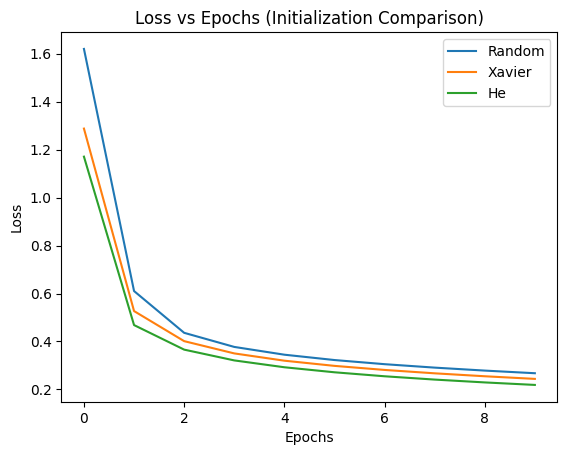

In [7]:
plt.plot(history_random.history['loss'], label='Random')
plt.plot(history_xavier.history['loss'], label='Xavier')
plt.plot(history_he.history['loss'], label='He')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (Initialization Comparison)")
plt.legend()
plt.show()

PART B — OPTIMIZER COMPARISON

Adam Optimizer with Best Initialization

In [8]:
model_adam = build_model(
    tf.keras.initializers.HeNormal(),
    tf.keras.optimizers.Adam()
)

history_adam = model_adam.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8355 - loss: 0.5815 - val_accuracy: 0.9515 - val_loss: 0.1597
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9568 - loss: 0.1505 - val_accuracy: 0.9642 - val_loss: 0.1144
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9714 - loss: 0.1014 - val_accuracy: 0.9693 - val_loss: 0.0961
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9790 - loss: 0.0743 - val_accuracy: 0.9723 - val_loss: 0.0865
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9837 - loss: 0.0564 - val_accuracy: 0.9750 - val_loss: 0.0809
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9878 - loss: 0.0436 - val_accuracy: 0.9764 - val_loss: 0.0799
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9911 - loss: 0.0344 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9931 - loss: 0.0272 - val_accuracy: 0

Optimizer Comparison Plot

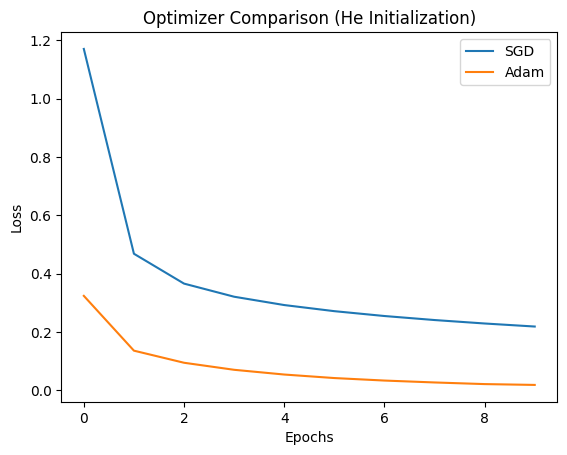

In [9]:
plt.plot(history_he.history['loss'], label='SGD')
plt.plot(history_adam.history['loss'], label='Adam')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimizer Comparison (He Initialization)")
plt.legend()
plt.show()